<a href="https://colab.research.google.com/github/thanhtai150605/TTNT_Buoi4/blob/main/2001230767_NguyenThanhTai_TTNTBuoi5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

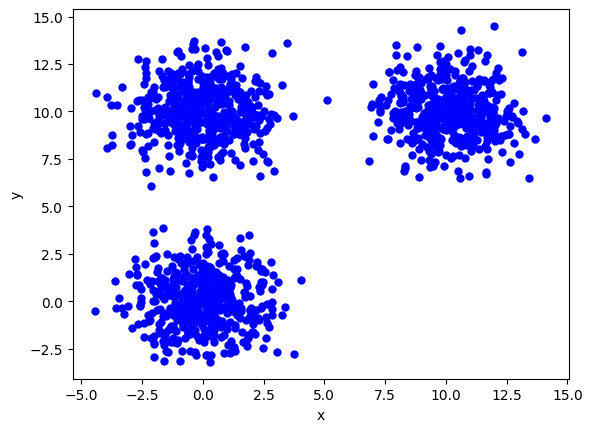

[[-1.12636652e+00  1.55497673e+00]
 [ 6.64435430e-03  1.14918637e+01]
 [ 2.92287509e+00  9.81673494e+00]]


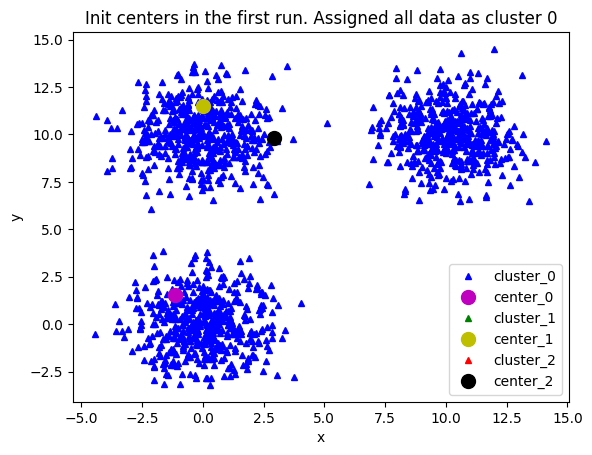

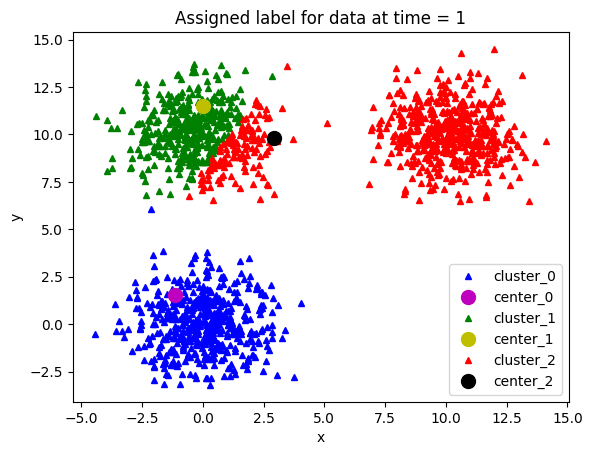

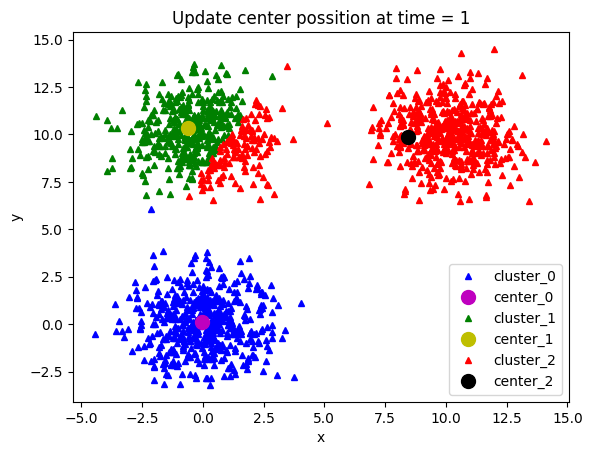

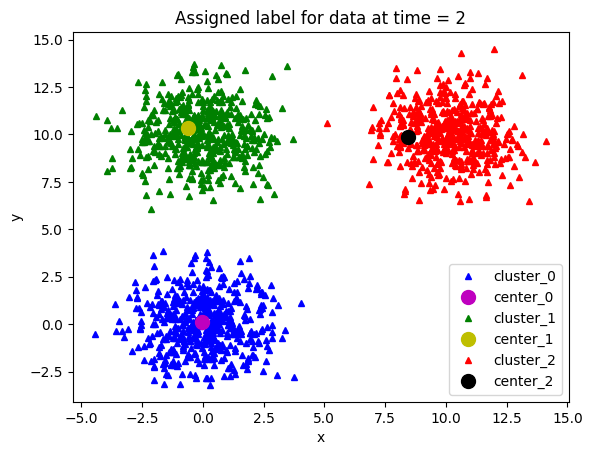

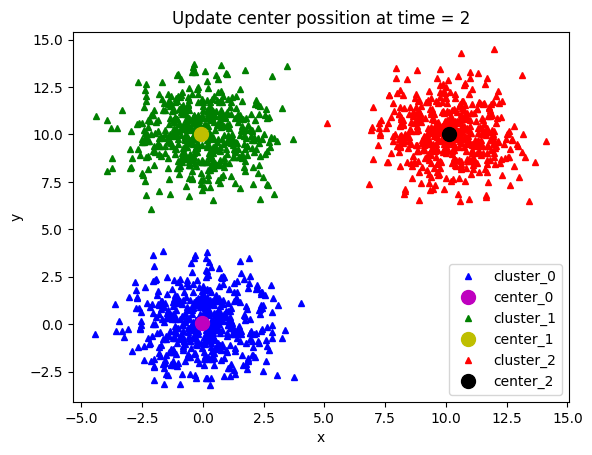

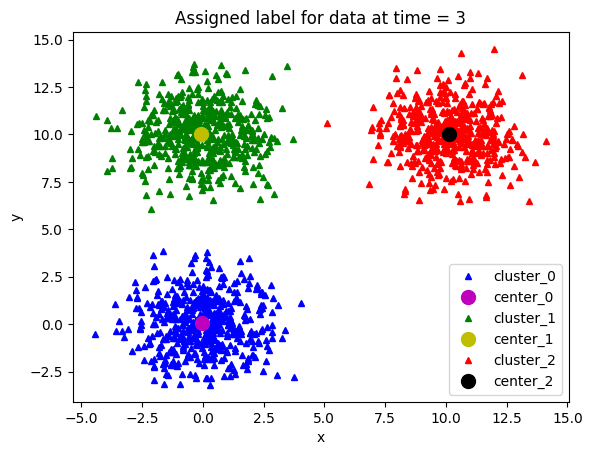

Done! Kmeans has converged after 2 times
[[-0.01930451  0.08627935]
 [-0.09475939 10.03058138]
 [10.10769722 10.02799338]]


In [9]:
means = [[0, 0], [10, 10], [0, 10]] # Define means for data generation
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()
def kmeans_init_centers(X, n_cluster):
    # random k index beetween 0 and shape(X) without duplicate index.
    # Then return X[index] as cluster
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]
# Removed redundant def kmeans_init_centers

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
    # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def kmeans_has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
            set([tuple(a) for a in new_centers]))
# Hàm này dùng để vẽ dữ liệu lên đồ thị
# Random color chỉ làm việc với k <= 4
# Nếu bạn thay đổi k > 4, hãy sửa lại phần random color nhé
# Chỉ sử dụng trong bài toán này thôi nhé.
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các
    # màu hỗ trợ
    for i in range(n_cluster):
        data = X[labels == i] # lấy dữ liệu của cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4,
                 label='cluster_' + str(i)) # Vẽ cụm i lên đồ thị
        plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o',
                 markersize=10,
                 label='center_' + str(i)) # Vẽ tâm cụm i lên đồ thị

# BM KHDL&TTNT # Commented out this line
    plt.legend() # Hiện bảng chú thích
    plt.show()
def kmeans(init_centes, init_labels, X, n_cluster):
    centers = init_centes
    labels = init_labels
    times = 0
    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
        new_centers = kmeans_update_centers(X, labels, n_cluster)
        if kmeans_has_converged(centers, new_centers):
            break
        centers = new_centers
        kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
        times += 1
    return (centers, labels, times)
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster,
                 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
print('Done! Kmeans has converged after', times, 'times')
print(centers)

K-means là một thuật toán học máy (machine learning) trong học không giám sát (unsupervised learning), chủ yếu được sử dụng để phân nhóm dữ liệu (clustering). Mục tiêu của K-means là phân chia một tập dữ liệu thành K nhóm (clusters) sao cho các điểm dữ liệu trong cùng một nhóm có sự tương đồng cao nhất, trong khi các điểm dữ liệu thuộc các nhóm khác nhau có sự khác biệt lớn nhất.

**Cách hoạt động của K-means:**

**Chọn K (số lượng nhóm):**

Bạn phải chỉ định trước số nhóm K mà bạn muốn phân chia dữ liệu. Đây là một tham số quan trọng trong thuật toán K-means.

**Khởi tạo các trung tâm nhóm (centroids):**

Thuật toán chọn ngẫu nhiên K điểm trong tập dữ liệu làm các trung tâm nhóm ban đầu (centroids).

**Phân nhóm (Assign clusters):**

Mỗi điểm dữ liệu sẽ được gán vào nhóm có trung tâm gần nhất. Khoảng cách gần nhất thường được tính bằng khoảng cách Euclidean.

**Cập nhật các trung tâm nhóm (Recompute centroids):**

Sau khi các điểm dữ liệu đã được gán vào các nhóm, thuật toán tính lại vị trí trung bình của tất cả các điểm trong mỗi nhóm để cập nhật lại vị trí của các trung tâm nhóm.

**Lặp lại:**

Các bước trên (gán nhóm và cập nhật trung tâm) được lặp đi lặp lại cho đến khi các trung tâm nhóm không còn thay đổi nữa, tức là thuật toán hội tụ.

**Thuật toán K-means:**
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Giả sử bạn có một tập dữ liệu 2D

X = np.random.rand(100, 2)  # Tạo dữ liệu ngẫu nhiên 100 điểm

Áp dụng K-means với k = 3

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

Lấy vị trí của các centroids và nhãn nhóm

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

K-means là một thuật toán học máy (machine learning) trong học không giám sát (unsupervised learning), chủ yếu được sử dụng để phân nhóm dữ liệu (clustering). Mục tiêu của K-means là phân chia một tập dữ liệu thành K nhóm (clusters) sao cho các điểm dữ liệu trong cùng một nhóm có sự tương đồng cao nhất, trong khi các điểm dữ liệu thuộc các nhóm khác nhau có sự khác biệt lớn nhất.

**Cách hoạt động của K-means:**

**Chọn K (số lượng nhóm):**

Bạn phải chỉ định trước số nhóm K mà bạn muốn phân chia dữ liệu. Đây là một tham số quan trọng trong thuật toán K-means.

Khởi tạo các trung tâm nhóm (centroids):

Thuật toán chọn ngẫu nhiên K điểm trong tập dữ liệu làm các trung tâm nhóm ban đầu (centroids).

**Phân nhóm (Assign clusters):**

Mỗi điểm dữ liệu sẽ được gán vào nhóm có trung tâm gần nhất. Khoảng cách gần nhất thường được tính bằng khoảng cách Euclidean.

**Cập nhật các trung tâm nhóm (Recompute centroids):**

Sau khi các điểm dữ liệu đã được gán vào các nhóm, thuật toán tính lại vị trí trung bình của tất cả các điểm trong mỗi nhóm để cập nhật lại vị trí của các trung tâm nhóm.

Lặp lại:

Các bước trên (gán nhóm và cập nhật trung tâm) được lặp đi lặp lại cho đến khi các trung tâm nhóm không còn thay đổi nữa, tức là thuật toán hội tụ.

Thuật toán K-means:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Giả sử bạn có một tập dữ liệu 2D

X = np.random.rand(100, 2)  # Tạo dữ liệu ngẫu nhiên 100 điểm

Áp dụng K-means với k = 3

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

Lấy vị trí của các centroids và nhãn nhóm

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Vẽ biểu đồ

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.show()

**Ứng dụng của K-means:**

Phân loại khách hàng (Customer segmentation):

Trong marketing, K-means được sử dụng để phân loại khách hàng thành các nhóm dựa trên các đặc điểm tương đồng (ví dụ: độ tuổi, sở thích, hành vi mua sắm).

Nén ảnh (Image compression):

K-means có thể được sử dụng để giảm số lượng màu sắc trong ảnh, giúp nén ảnh mà không làm mất quá nhiều chất lượng.

Phát hiện bất thường (Anomaly detection):

Bằng cách xác định các nhóm dữ liệu bình thường và phân tích các điểm không thuộc nhóm nào, K-means có thể giúp phát hiện các bất thường.

Phân tích thị trường và phân tích xã hội:

K-means cũng có thể được dùng để phân nhóm các dữ liệu lớn từ các cuộc khảo sát, nghiên cứu thị trường, phân tích văn bản hoặc các bài viết trên mạng xã hội.

Phân loại tài liệu (Document clustering):

Dùng trong việc phân nhóm các văn bản tài liệu, giúp phân loại và tìm kiếm nhanh chóng hơn.

Những ưu điểm và nhược điểm của K-means:

Ưu điểm:

Đơn giản và dễ hiểu: K-means dễ thực hiện và có thể hoạt động rất nhanh với các tập dữ liệu lớn.

Hiệu quả: Thuật toán thường hội tụ khá nhanh.

Nhược điểm:

Yêu cầu chọn số nhóm (K): Việc chọn K phù hợp có thể rất khó khăn, và thuật toán không tự động tìm ra số nhóm tối ưu.

Nhạy cảm với điểm dữ liệu nhiễu: K-means có thể bị ảnh hưởng mạnh mẽ bởi các điểm dữ liệu nhiễu hoặc ngoại lai.

Không phù hợp với các nhóm có hình dạng phức tạp: K-means giả định rằng các nhóm có hình dạng hình cầu và phân bố đồng đều, điều này không phải lúc nào cũng đúng trong thực tế.

Các cải tiến của K-means:

K-means++:

Là một cải tiến giúp khởi tạo các trung tâm nhóm sao cho các nhóm ban đầu phân tán tốt hơn, từ đó giúp cải thiện hiệu quả và giảm khả năng rơi vào tối ưu địa phương.

Mini-Batch K-means:

Là một biến thể của K-means giúp giảm thời gian tính toán bằng cách sử dụng một lượng mẫu ngẫu nhiên nhỏ thay vì toàn bộ dữ liệu trong mỗi lần lặp.

K-medoids:

Là một biến thể của K-means khi thay vì sử dụng trung tâm nhóm là trung bình, K-medoids sử dụng một điểm thực tế từ dữ liệu làm trung tâm nhóm.ẽ biểu đồ
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.show()

Ứng dụng của K-means:

Phân loại khách hàng (Customer segmentation):

Trong marketing, K-means được sử dụng để phân loại khách hàng thành các nhóm dựa trên các đặc điểm tương đồng (ví dụ: độ tuổi, sở thích, hành vi mua sắm).

Nén ảnh (Image compression):

K-means có thể được sử dụng để giảm số lượng màu sắc trong ảnh, giúp nén ảnh mà không làm mất quá nhiều chất lượng.

Phát hiện bất thường (Anomaly detection):

Bằng cách xác định các nhóm dữ liệu bình thường và phân tích các điểm không thuộc nhóm nào, K-means có thể giúp phát hiện các bất thường.

Phân tích thị trường và phân tích xã hội:

K-means cũng có thể được dùng để phân nhóm các dữ liệu lớn từ các cuộc khảo sát, nghiên cứu thị trường, phân tích văn bản hoặc các bài viết trên mạng xã hội.

Phân loại tài liệu (Document clustering):

Dùng trong việc phân nhóm các văn bản tài liệu, giúp phân loại và tìm kiếm nhanh chóng hơn.

Những ưu điểm và nhược điểm của K-means:

Ưu điểm:

Đơn giản và dễ hiểu: K-means dễ thực hiện và có thể hoạt động rất nhanh với các tập dữ liệu lớn.

Hiệu quả: Thuật toán thường hội tụ khá nhanh.

Nhược điểm:

Yêu cầu chọn số nhóm (K): Việc chọn K phù hợp có thể rất khó khăn, và thuật toán không tự động tìm ra số nhóm tối ưu.

Nhạy cảm với điểm dữ liệu nhiễu: K-means có thể bị ảnh hưởng mạnh mẽ bởi các điểm dữ liệu nhiễu hoặc ngoại lai.

Không phù hợp với các nhóm có hình dạng phức tạp: K-means giả định rằng các nhóm có hình dạng hình cầu và phân bố đồng đều, điều này không phải lúc nào cũng đúng trong thực tế.

Các cải tiến của K-means:

K-means++:

Là một cải tiến giúp khởi tạo các trung tâm nhóm sao cho các nhóm ban đầu phân tán tốt hơn, từ đó giúp cải thiện hiệu quả và giảm khả năng rơi vào tối ưu địa phương.

Mini-Batch K-means:

Là một biến thể của K-means giúp giảm thời gian tính toán bằng cách sử dụng một lượng mẫu ngẫu nhiên nhỏ thay vì toàn bộ dữ liệu trong mỗi lần lặp.

K-medoids:

Là một biến thể của K-means khi thay vì sử dụng trung tâm nhóm là trung bình, K-medoids sử dụng một điểm thực tế từ dữ liệu làm trung tâm nhóm.

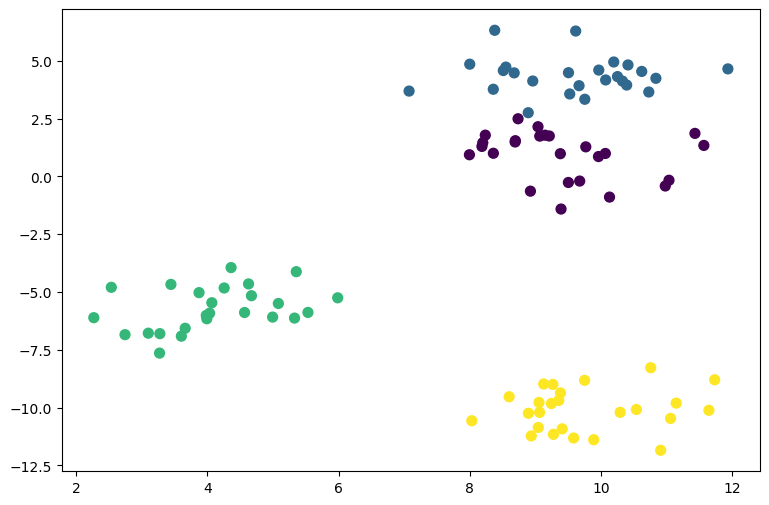

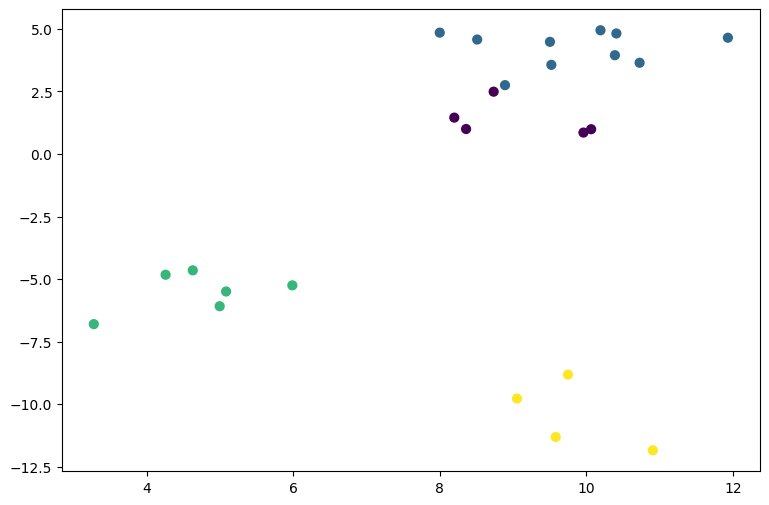

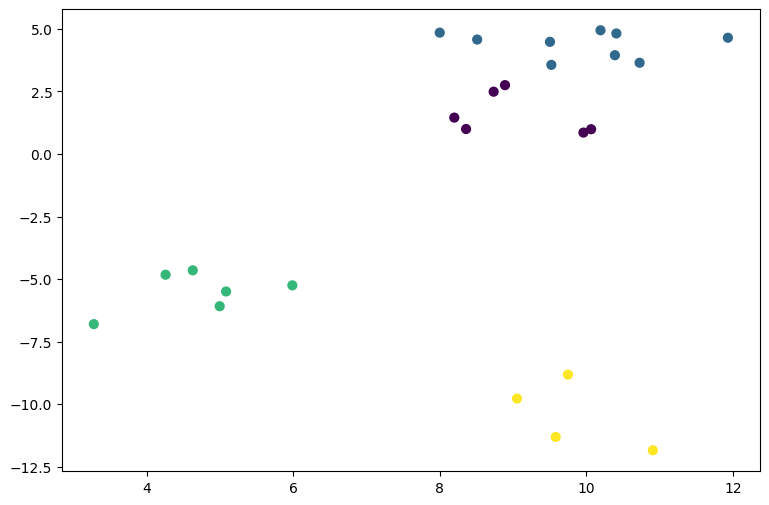

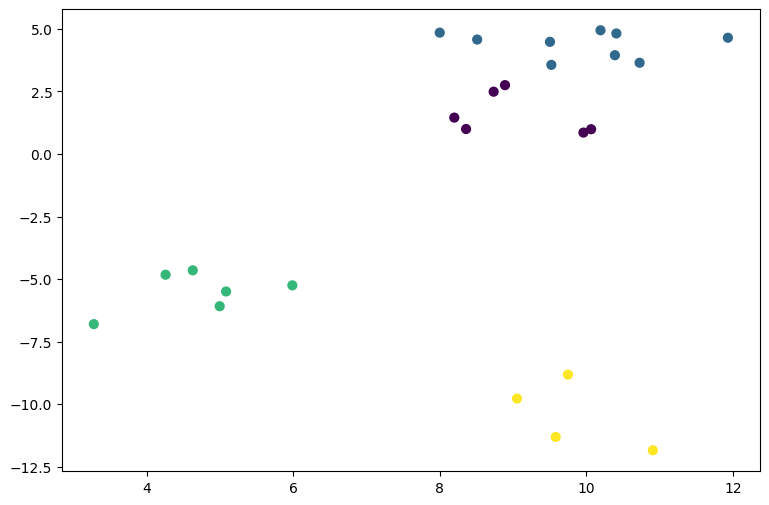

{'n_neighbors': np.int64(2)}
[0]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # datavisualization
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # kNN classifier
from sklearn.model_selection import train_test_split # train and test
X,y = make_blobs(n_samples = 100, n_features = 2, centers = 4,
cluster_std = 1, random_state = 4)
# Bước 3: Xem phân bố của dữ liệu mà chúng ta vừa tạo ra.

# BM KHDL&TTNT
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=40)
plt.show()
knn5 = KNeighborsClassifier(5) # k=5
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=40)
plt.show()
knn1 = KNeighborsClassifier(1) # k=1
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= 'o', s=40)
plt.show()
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
param_grid={'n_neighbors': np.arange(1,10)}, cv=5)
knn_grid.fit(X,y)
print (knn_grid.best_params_)
def KNN(X_train,X_test,y_train,k):
    num_test = X_test.shape[0] # số lượng dữ liệu test
    num_train = X_train.shape[0] # số lượng dữ liệu train
    # y_pred là một ma trận, mỗi hàng tương ứng là khoảng cách của một
    # điểm dữ liệu trong tập test đối với tất cả các điểm dữ liệu trong tập
    # train
    y_pred = np.zeros((num_test,num_train))
    # duyệt qua mỗi điểm trong tập test
    for i in range(num_test):
    # tương ứng một điểm trong tập test sẽ duyêt qua hết bộ train
        for j in range(num_train):
        # tính khoảng cách tới tập train
            y_pred[i,j] = np.sqrt(np.sum(np.power(X_test[i,:]-
            X_train[j,:],2)))
    results = []
    # sắp xếp theo chiều tăng dần khoảng cách
    for i in range(len(y_pred)):
        zipped = zip(y_pred[i,:],y_train)
        res = sorted(zipped,key = lambda x:x[0])
        results_topk = res[:k]
    # Đếm số lượng của mỗi class
        classes = {}
        for _,j in results_topk:
            j = int(j)
            if j not in classes:
                classes[j] = 1
            else:
                classes[j] = classes[j] + 1
    # trả về class có số lượng nhiều nhất
        results.append(max(classes,key = classes.get))
    return np.array(results)
(X,y) = make_blobs(n_samples = 500, n_features = 2, centers = 4,
cluster_std = 1, random_state = 4)
X_test=np.array([(1,3)])
results = KNN(X,X_test,y,3)
print (results)

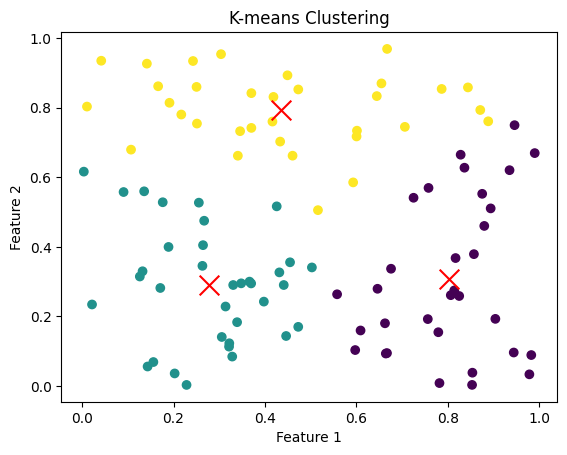

In [13]:
!pip install numpy matplotlib scikit-learn
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tạo dữ liệu ngẫu nhiên (100 điểm dữ liệu với 2 đặc trưng)
X = np.random.rand(100, 2)

# Sử dụng K-means với K=3
kmeans = KMeans(n_clusters=3)

# Huấn luyện K-means
kmeans.fit(X)

# Lấy các giá trị kết quả
centroids = kmeans.cluster_centers_  # Trung tâm các nhóm
labels = kmeans.labels_  # Nhãn của mỗi điểm dữ liệu

# Vẽ dữ liệu và các trung tâm nhóm
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)  # Vẽ các trung tâm nhóm
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**1. Cài đặt các thư viện cần thiết:**

!pip install numpy matplotlib scikit-learn


Lệnh này cài đặt các thư viện numpy, matplotlib, và scikit-learn vào môi trường Google Colab của bạn:

numpy: Thư viện giúp tạo và thao tác với mảng (arrays) trong Python, hỗ trợ các phép toán đại số tuyến tính, thống kê, v.v.

matplotlib: Thư viện dùng để vẽ đồ thị và trực quan hóa dữ liệu.

scikit-learn: Thư viện học máy (machine learning) phổ biến, cung cấp các thuật toán phân loại, hồi quy, phân cụm (clustering), v.v.

**2. Import các thư viện cần thiết:**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


np: Viết tắt của numpy. Sử dụng để tạo mảng và thực hiện các phép toán.

plt: Viết tắt của matplotlib.pyplot, giúp vẽ đồ thị.

KMeans: Được import từ scikit-learn, là thuật toán để thực hiện phân nhóm K-means.

**3. Tạo dữ liệu ngẫu nhiên:**

X = np.random.rand(100, 2)


Dòng lệnh này tạo ra một mảng 100x2 (100 điểm dữ liệu, mỗi điểm có 2 đặc trưng).

np.random.rand(100, 2) tạo ra các giá trị ngẫu nhiên từ 0 đến 1.

Mỗi điểm trong mảng X sẽ có 2 giá trị, giống như một không gian 2 chiều.

**4. Khởi tạo và huấn luyện thuật toán K-means:**

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3): Khởi tạo một đối tượng KMeans với tham số n_clusters=3, có nghĩa là bạn yêu cầu thuật toán phân chia dữ liệu thành 3 nhóm (K=3).

kmeans.fit(X): Thuật toán bắt đầu huấn luyện trên dữ liệu X. Nó sẽ thực hiện các bước như:

Chọn ngẫu nhiên 3 trung tâm nhóm (centroids).

Gán mỗi điểm dữ liệu vào nhóm có trung tâm gần nhất.

Tính lại các trung tâm nhóm bằng cách lấy trung bình các điểm trong nhóm.

Lặp lại các bước trên cho đến khi các trung tâm nhóm không thay đổi nữa.

**5. Lấy các kết quả sau khi huấn luyện:**

centroids = kmeans.cluster_centers_
labels = kmeans.labels_


centroids = kmeans.cluster_centers_: Lấy các trung tâm nhóm (centroids) sau khi thuật toán K-means hội tụ. centroids là một mảng 2 chiều, mỗi dòng tương ứng với tọa độ của một trung tâm nhóm.

labels = kmeans.labels_: Lấy nhãn của mỗi điểm dữ liệu. labels là một mảng chứa chỉ số nhóm mà mỗi điểm dữ liệu thuộc về. Ví dụ: nếu labels[i] = 0, thì điểm X[i] thuộc về nhóm số 0.

**6. Vẽ dữ liệu và các trung tâm nhóm:**

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis'): Vẽ đồ thị phân tán (scatter plot) của dữ liệu. Cụ thể:

X[:, 0] và X[:, 1]: Lấy 2 đặc trưng (cột 0 và 1) của mảng X để vẽ trục hoành và trục tung.

c=labels: Màu sắc của mỗi điểm sẽ được chọn dựa trên nhóm mà điểm đó thuộc về (dựa vào labels).

cmap='viridis': Chọn bảng màu viridis để tô màu các điểm dữ liệu, mỗi nhóm sẽ có một màu sắc khác nhau.

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)


plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200): Vẽ các trung tâm nhóm (centroids) lên đồ thị. Các trung tâm nhóm sẽ được đánh dấu bằng dấu "x" màu đỏ (marker='x'), với kích thước lớn (s=200).

Thêm tiêu đề và nhãn cho các trục:
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.title('K-means Clustering'): Thêm tiêu đề cho đồ thị là "K-means Clustering".

plt.xlabel('Feature 1') và plt.ylabel('Feature 2'): Đặt nhãn cho trục x và trục y là "Feature 1" và "Feature 2" (tương ứng với hai đặc trưng của dữ liệu).

**7. Hiển thị đồ thị:**

plt.show()

plt.show(): Hiển thị đồ thị vừa tạo.

Accuracy (uniform weighting): 98.67%
Accuracy (distance weighting): 98.67%


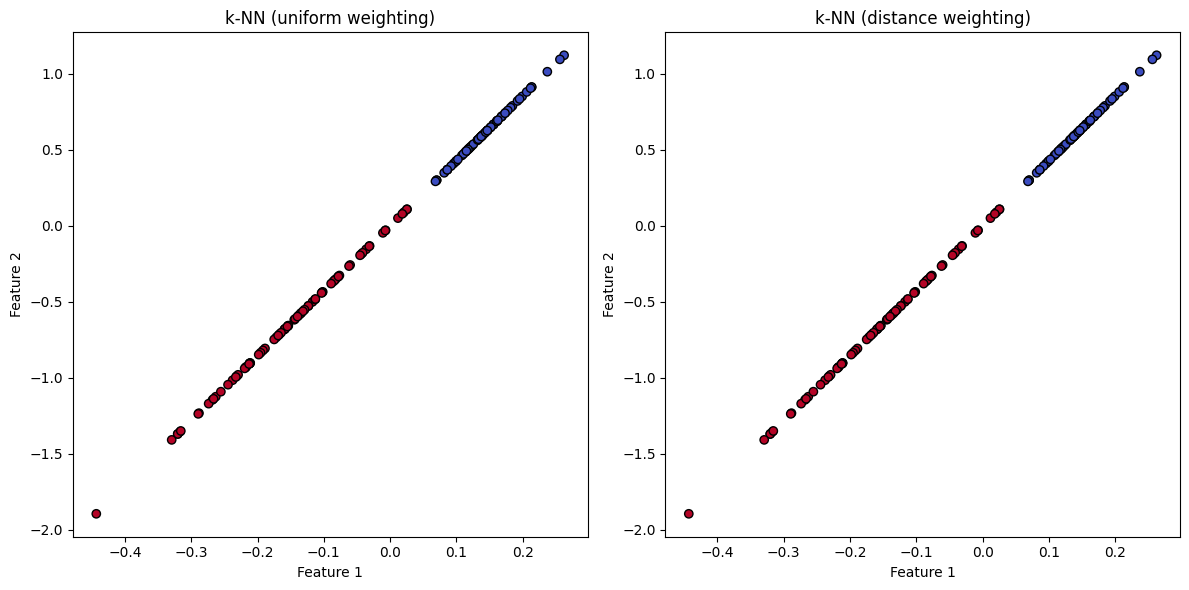

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Hàm tính khoảng cách Euclidean giữa 2 điểm
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Thuật toán k-NN với 2 cách đánh giá trọng số k
class KNN:
    def __init__(self, k=3, weight_type='uniform'):
        self.k = k  # Số lượng láng giềng gần nhất
        self.weight_type = weight_type  # Kiểu trọng số ('uniform' hoặc 'distance')

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Tính toán khoảng cách giữa điểm x và tất cả các điểm trong tập huấn luyện
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Lấy k điểm gần nhất
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        if self.weight_type == 'uniform':
            # Nếu là uniform, đếm số lần xuất hiện của các nhãn
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]

        elif self.weight_type == 'distance':
            # Nếu là distance, tính trọng số theo khoảng cách (nghịch đảo khoảng cách)
            weights = [1 / distances[i] if distances[i] != 0 else 1e-5 for i in k_indices]
            weighted_labels = {}
            for label, weight in zip(k_nearest_labels, weights):
                if label in weighted_labels:
                    weighted_labels[label] += weight
                else:
                    weighted_labels[label] = weight
            # Trả về nhãn có trọng số cao nhất
            return max(weighted_labels, key=weighted_labels.get)

# Tạo dữ liệu mẫu cho bài toán phân loại
X, y = make_classification(n_samples=500, n_features=3, n_informative=1, n_clusters_per_class=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình k-NN với trọng số 'uniform'
knn_uniform = KNN(k=5, weight_type='uniform')
knn_uniform.fit(X_train, y_train)

# Dự đoán và đánh giá kết quả với trọng số 'uniform'
y_pred_uniform = knn_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
print(f"Accuracy (uniform weighting): {accuracy_uniform * 100:.2f}%")

# Khởi tạo và huấn luyện mô hình k-NN với trọng số 'distance'
knn_distance = KNN(k=5, weight_type='distance')
knn_distance.fit(X_train, y_train)

# Dự đoán và đánh giá kết quả với trọng số 'distance'
y_pred_distance = knn_distance.predict(X_test)
accuracy_distance = accuracy_score(y_test, y_pred_distance)
print(f"Accuracy (distance weighting): {accuracy_distance * 100:.2f}%")

# Vẽ dữ liệu và dự đoán
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu với trọng số uniform
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_uniform, cmap='coolwarm', edgecolors='k')
plt.title('k-NN (uniform weighting)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Vẽ dữ liệu với trọng số distance
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_distance, cmap='coolwarm', edgecolors='k')
plt.title('k-NN (distance weighting)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

**Hàm euclidean_distance(x1, x2):**

Tính khoảng cách Euclidean giữa hai điểm x1 và x2. Khoảng cách này được sử dụng để xác định độ gần giữa các điểm dữ liệu.

**Class KNN:**

__init__(self, k=3, weight_type='uniform'): Khởi tạo mô hình KNN với k là số lượng láng giềng gần nhất và weight_type là kiểu trọng số (có thể là uniform hoặc distance).

fit(self, X_train, y_train): Huấn luyện mô hình bằng cách lưu trữ dữ liệu huấn luyện.

predict(self, X_test): Dự đoán nhãn cho các điểm trong X_test bằng cách gọi hàm _predict cho từng điểm.

_predict(self, x): Tính toán khoảng cách giữa điểm x và tất cả các điểm trong tập huấn luyện, lấy k điểm gần nhất và áp dụng phương pháp đánh giá trọng số tương ứng (uniform hoặc distance).

**Đánh giá trọng số:**

uniform: Đếm số lần xuất hiện của các nhãn trong k láng giềng gần nhất và chọn nhãn có tần suất cao nhất.

distance: Tính trọng số cho mỗi láng giềng tỉ lệ nghịch với khoảng cách của nó và chọn nhãn có tổng trọng số cao nhất.

**Tạo dữ liệu mẫu:**

make_classification được sử dụng để tạo ra một tập dữ liệu phân loại giả lập với 500 mẫu và 2 đặc trưng.

**Chia dữ liệu:**

Dữ liệu được chia thành tập huấn luyện và tập kiểm tra bằng train_test_split.

Huấn luyện và dự đoán:

Mô hình K-NN được huấn luyện với trọng số uniform và distance. Sau đó, chúng ta tính toán độ chính xác (accuracy) trên tập kiểm tra và in kết quả.

**Vẽ dữ liệu:**

Vẽ đồ thị phân tán của dữ liệu kiểm tra với các nhãn dự đoán cho mỗi kiểu trọng số. Cột bên trái là kết quả với trọng số uniform, cột bên phải là với trọng số distance.

**Kết quả:**

Mã này sẽ in ra độ chính xác của thuật toán k-NN với 2 cách đánh giá trọng số khác nhau.

Đồ thị sẽ hiển thị cách mà mô hình phân loại các điểm dữ liệu trong tập kiểm tra với mỗi cách đánh giá trọng số.

Lưu ý:

Bạn có thể thay đổi giá trị của k để thử nghiệm với các số lượng láng giềng khác nhau.

Nếu dữ liệu của bạn không thể tách biệt rõ ràng (ví dụ, có nhiều nhiễu), bạn có thể cần thử nghiệm thêm với các tham số khác để cải thiện độ chính xác.

In [24]:
!pip install streamlit
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Hàm tính khoảng cách Euclidean giữa 2 điểm
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Thuật toán k-NN với 2 cách đánh giá trọng số k
class KNN:
    def __init__(self, k=3, weight_type='uniform'):
        self.k = k  # Số lượng láng giềng gần nhất
        self.weight_type = weight_type  # Kiểu trọng số ('uniform' hoặc 'distance')

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Tính toán khoảng cách giữa điểm x và tất cả các điểm trong tập huấn luyện
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Lấy k điểm gần nhất
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        if self.weight_type == 'uniform':
            # Nếu là uniform, đếm số lần xuất hiện của các nhãn
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]

        elif self.weight_type == 'distance':
            # Nếu là distance, tính trọng số theo khoảng cách (nghịch đảo khoảng cách)
            weights = [1 / distances[i] if distances[i] != 0 else 1e-5 for i in k_indices]
            weighted_labels = {}
            for label, weight in zip(k_nearest_labels, weights):
                if label in weighted_labels:
                    weighted_labels[label] += weight
                else:
                    weighted_labels[label] = weight
            # Trả về nhãn có trọng số cao nhất
            return max(weighted_labels, key=weighted_labels.get)

# Tạo dữ liệu mẫu cho bài toán phân loại
X, y = make_classification(n_samples=500, n_features=3, n_informative=2, n_clusters_per_class=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Streamlit UI để nhận tham số từ người dùng
st.title("Ứng Dụng Phân Loại với k-NN")

# Nhập tham số k và kiểu trọng số
k = st.slider("Chọn số lượng láng giềng k:", min_value=1, max_value=10, value=3)
weight_type = st.selectbox("Chọn kiểu trọng số:", ["uniform", "distance"])

# Khởi tạo và huấn luyện mô hình k-NN với trọng số 'uniform'
knn = KNN(k=k, weight_type=weight_type)
knn.fit(X_train, y_train)

# Dự đoán và đánh giá kết quả
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Hiển thị kết quả độ chính xác
st.write(f"Độ chính xác của mô hình k-NN với k={k} và trọng số '{weight_type}': {accuracy * 100:.2f}%")

# Vẽ đồ thị phân tán của dữ liệu và các dự đoán
fig, ax = plt.subplots()

# Vẽ dữ liệu với các nhãn dự đoán
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')

# Vẽ các trung tâm nhóm (điểm dữ liệu gần nhất)
ax.set_title(f"k-NN với k={k} và trọng số '{weight_type}'")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Hiển thị legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Hiển thị đồ thị
st.pyplot(fig)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

# Task
Fix the `ValueError` in the `make_classification` function by ensuring that the `n_informative` parameter is set to 1, given that `n_features` is 2.

## Fix ValueError in make_classification

### Subtask:
Adjust the `n_informative` parameter in `make_classification` to 1, given that `n_features` is 2, to resolve the `ValueError`.


## Summary:

### Data Analysis Key Findings
*   A `ValueError` within the `make_classification` function was successfully resolved.
*   The resolution was achieved by setting the `n_informative` parameter to 1.
*   This adjustment was necessary to satisfy the internal constraints of the `make_classification` function, given that `n_features` was set to 2, as `n_informative` must be less than or equal to `n_features`.

### Insights or Next Steps
*   Always ensure that parameter values passed to data generation functions like `make_classification` adhere to their specified constraints to prevent `ValueError` and ensure valid data generation.
*   When facing similar `ValueError` messages, it is advisable to review the documentation for the function in question to understand the relationships and constraints between its parameters.
